In [1]:
%matplotlib inline

# Examples of oceanic drift

*2023-09-13, kaihc@met.no*

## Cases:

1. No effect of turbulent mixing, 
   i.e. constant depth for all particles throughout.
1. With turbulent mixing, 
   i.e. all particles moves freely in the vertical with **no buoyancy**.
1. With turbulent mixing, but
   now with an additional **terminal rise velocity added**.

In [11]:
import numpy as np
from datetime import datetime, timedelta
from opendrift.readers import reader_netCDF_CF_generic
from opendrift.readers import reader_ROMS_native, reader_netCDF_CF_generic
from opendrift.models.oceandrift import OceanDrift

In [12]:
# Initialise cases
loglev = 20 # Set loglevel to 0 for debug information
o1 = OceanDrift(loglevel=loglev)  
o2 = OceanDrift(loglevel=loglev) 
o3 = OceanDrift(loglevel=loglev) 

# Creating and adding reader for Norkyst current dataset and WAM wave data set
norkyst = reader_netCDF_CF_generic.Reader('https://thredds.met.no/thredds/dodsC/sea/norkyst800m/1h/aggregate_be')


08:04:12 INFO    opendrift.models.basemodel:532: OpenDriftSimulation initialised (version 1.10.6 / v1.10.6-8-g8b4ee8b-dirty)
08:04:12 INFO    opendrift.models.basemodel:532: OpenDriftSimulation initialised (version 1.10.6 / v1.10.6-8-g8b4ee8b-dirty)
08:04:12 INFO    opendrift.models.basemodel:532: OpenDriftSimulation initialised (version 1.10.6 / v1.10.6-8-g8b4ee8b-dirty)
08:04:12 INFO    opendrift.readers.reader_netCDF_CF_generic:138: Opening dataset: https://thredds.met.no/thredds/dodsC/sea/norkyst800m/1h/aggregate_be


In [13]:
# Initial position
ini_lat = 59.0
ini_lon = 10.6

# Number of particles and their depth distribution
N = 5
zvec = np.linspace(0, -2.5, N)

In [14]:
# First simulation: no effect of turbulent mixing, 
# i.e. constant depth for all particles throughout.

# Add readers for input data
o1.add_reader([norkyst])

# Configurations
o1.set_config('drift:vertical_mixing', False)

# Initialize and run
o1.seed_elements(lon=ini_lon, lat=ini_lat, radius=0, number=N,
                z=zvec, time=datetime.utcnow(), wind_drift_factor=0.0, terminal_velocity=0.0)
o1.run(duration=timedelta(hours=24), time_step=600)

08:04:19 INFO    opendrift.models.basemodel:2579: Fallback values will be used for the following variables which have no readers: 
08:04:19 INFO    opendrift.models.basemodel:2582: 	ocean_vertical_diffusivity: 0.000000
08:04:19 INFO    opendrift.models.basemodel:2582: 	sea_surface_wave_significant_height: 0.000000
08:04:19 INFO    opendrift.models.basemodel:2582: 	sea_surface_wave_stokes_drift_x_velocity: 0.000000
08:04:19 INFO    opendrift.models.basemodel:2582: 	sea_surface_wave_stokes_drift_y_velocity: 0.000000
08:04:19 INFO    opendrift.models.basemodel:2582: 	sea_surface_wave_period_at_variance_spectral_density_maximum: 0.000000
08:04:19 INFO    opendrift.models.basemodel:2582: 	sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0.000000
08:04:19 INFO    opendrift.models.basemodel:2582: 	surface_downward_x_stress: 0.000000
08:04:19 INFO    opendrift.models.basemodel:2582: 	surface_downward_y_stress: 0.000000
08:04:19 INFO    opendrift.models.basem

In [15]:
# Second simulation: particles are free to move in the vertical, but no buoyancy

# Add readers for input data
o2.add_reader([norkyst])

# Configurations
o2.set_config('drift:vertical_mixing', True)

# Initialize and run
o2.seed_elements(lon=ini_lon, lat=ini_lat, radius=0, number=N,
                z=zvec, time=datetime.utcnow(), wind_drift_factor=0.0, terminal_velocity=0.0)
o2.run(duration=timedelta(hours=24), time_step=600)

08:04:30 INFO    opendrift.models.basemodel:2579: Fallback values will be used for the following variables which have no readers: 
08:04:30 INFO    opendrift.models.basemodel:2582: 	ocean_vertical_diffusivity: 0.000000
08:04:30 INFO    opendrift.models.basemodel:2582: 	sea_surface_wave_significant_height: 0.000000
08:04:30 INFO    opendrift.models.basemodel:2582: 	sea_surface_wave_stokes_drift_x_velocity: 0.000000
08:04:30 INFO    opendrift.models.basemodel:2582: 	sea_surface_wave_stokes_drift_y_velocity: 0.000000
08:04:30 INFO    opendrift.models.basemodel:2582: 	sea_surface_wave_period_at_variance_spectral_density_maximum: 0.000000
08:04:30 INFO    opendrift.models.basemodel:2582: 	sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0.000000
08:04:30 INFO    opendrift.models.basemodel:2582: 	surface_downward_x_stress: 0.000000
08:04:30 INFO    opendrift.models.basemodel:2582: 	surface_downward_y_stress: 0.000000
08:04:30 INFO    opendrift.models.basem

In [7]:
# Third simulation: With turbulent mixing (as case 2), 
# and with a terminal rise velocity of a few mm/s.

# Add readers for input data
o3.add_reader([norkyst])

# Configurations
o3.set_config('drift:vertical_mixing', True)

# Initialize and run
o3.seed_elements(lon=ini_lon, lat=ini_lat, radius=0, number=N,
                z=zvec, time=datetime.utcnow(), wind_drift_factor=0.0, terminal_velocity=0.0002)
o3.run(duration=timedelta(hours=24), time_step=600)

08:02:52 INFO    opendrift.models.basemodel:2579: Fallback values will be used for the following variables which have no readers: 
08:02:52 INFO    opendrift.models.basemodel:2582: 	ocean_vertical_diffusivity: 0.000000
08:02:52 INFO    opendrift.models.basemodel:2582: 	sea_surface_wave_significant_height: 0.000000
08:02:52 INFO    opendrift.models.basemodel:2582: 	sea_surface_wave_stokes_drift_x_velocity: 0.000000
08:02:52 INFO    opendrift.models.basemodel:2582: 	sea_surface_wave_stokes_drift_y_velocity: 0.000000
08:02:52 INFO    opendrift.models.basemodel:2582: 	sea_surface_wave_period_at_variance_spectral_density_maximum: 0.000000
08:02:52 INFO    opendrift.models.basemodel:2582: 	sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0.000000
08:02:52 INFO    opendrift.models.basemodel:2582: 	surface_downward_x_stress: 0.000000
08:02:52 INFO    opendrift.models.basemodel:2582: 	surface_downward_y_stress: 0.000000
08:02:52 INFO    opendrift.models.basem

08:02:59 WARNING opendrift.models.basemodel:3214: Plotting fast. This will make your plots less accurate.


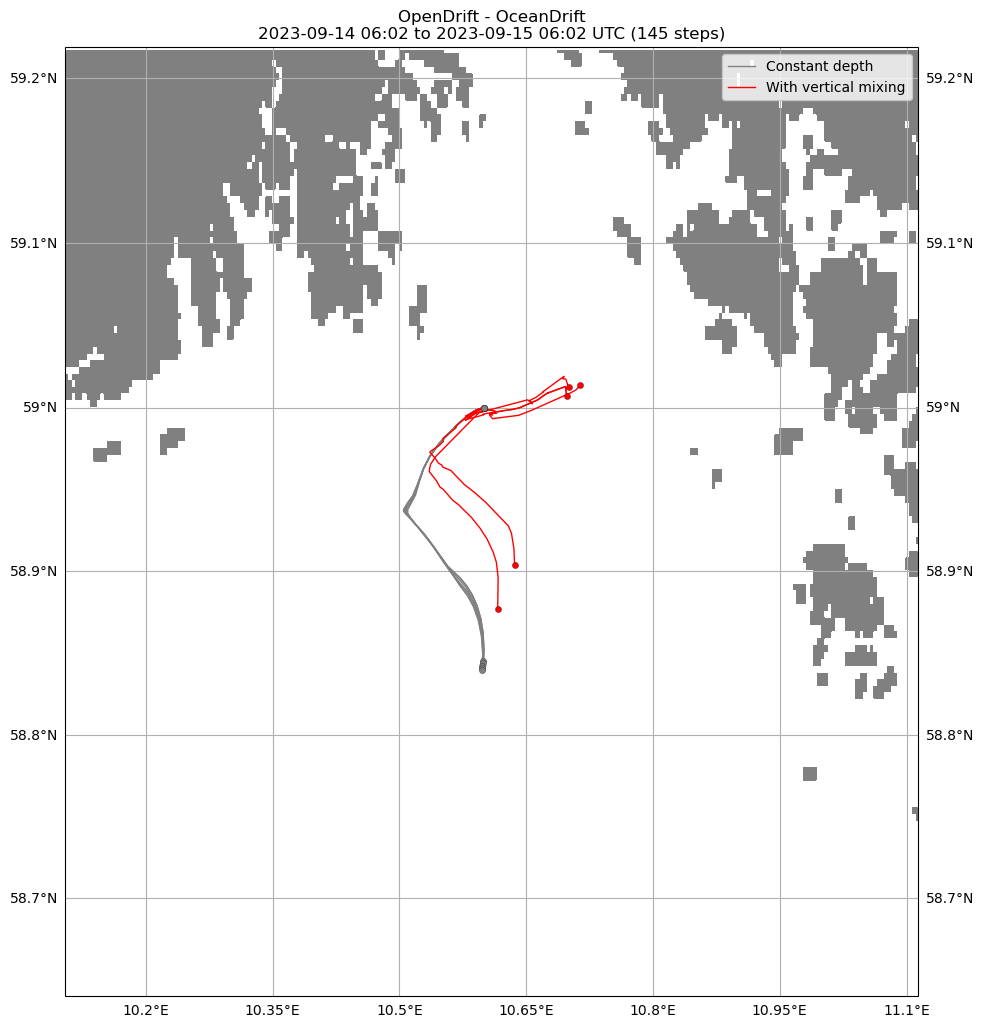

(<GeoAxes: title={'center': 'OpenDrift - OceanDrift\n2023-09-14 06:02 to 2023-09-15 06:02 UTC (145 steps)'}>,
 <Figure size 988.852x1100 with 1 Axes>)

In [8]:
# Plot differences between case 1 and 2:
o1.plot(compare=o2, fast=True, legend=['Constant depth', 'With vertical mixing'])

08:03:00 WARNING opendrift.models.basemodel:3214: Plotting fast. This will make your plots less accurate.


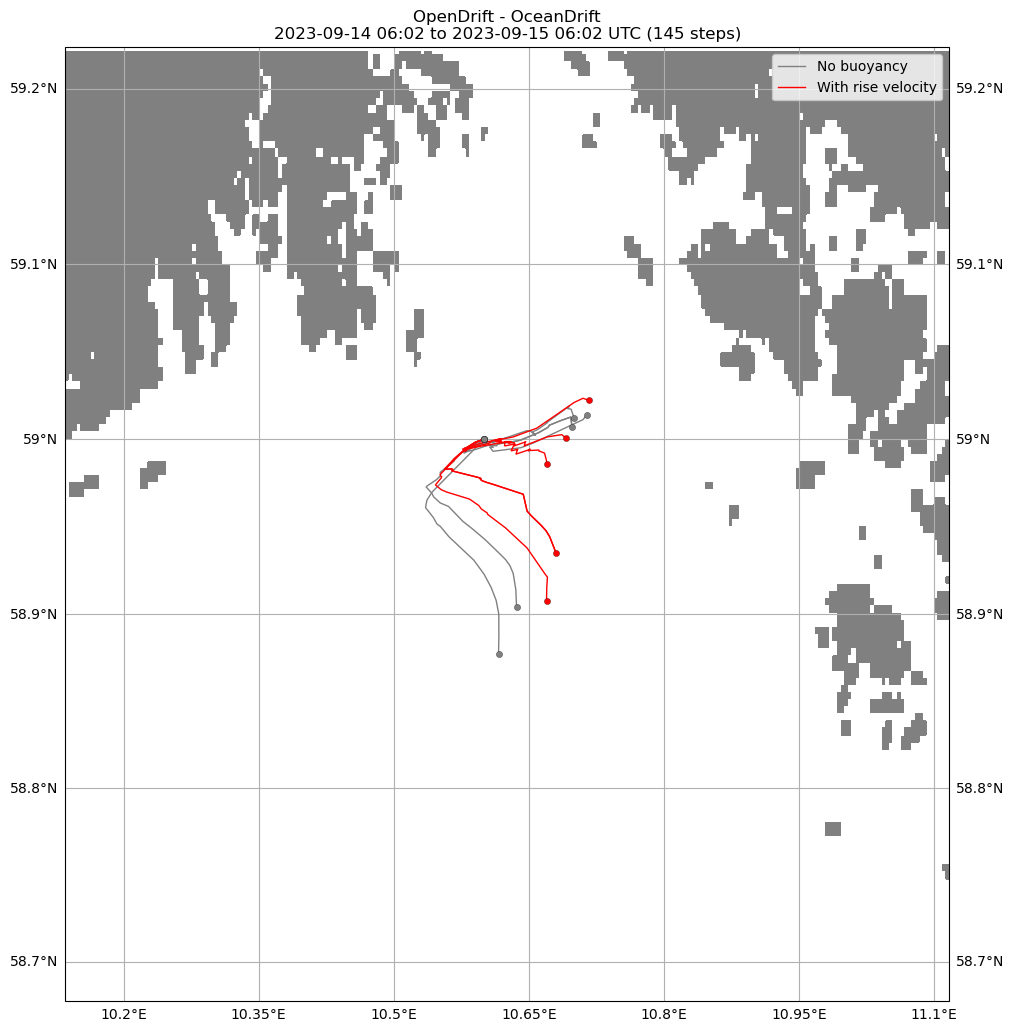

(<GeoAxes: title={'center': 'OpenDrift - OceanDrift\n2023-09-14 06:02 to 2023-09-15 06:02 UTC (145 steps)'}>,
 <Figure size 1019.31x1100 with 1 Axes>)

In [9]:
# Plot differences between case 2 and 3:
o2.plot(compare=o3, fast=True, legend=['No buoyancy', 'With rise velocity'])

08:03:01 WARNING opendrift.models.basemodel:3214: Plotting fast. This will make your plots less accurate.


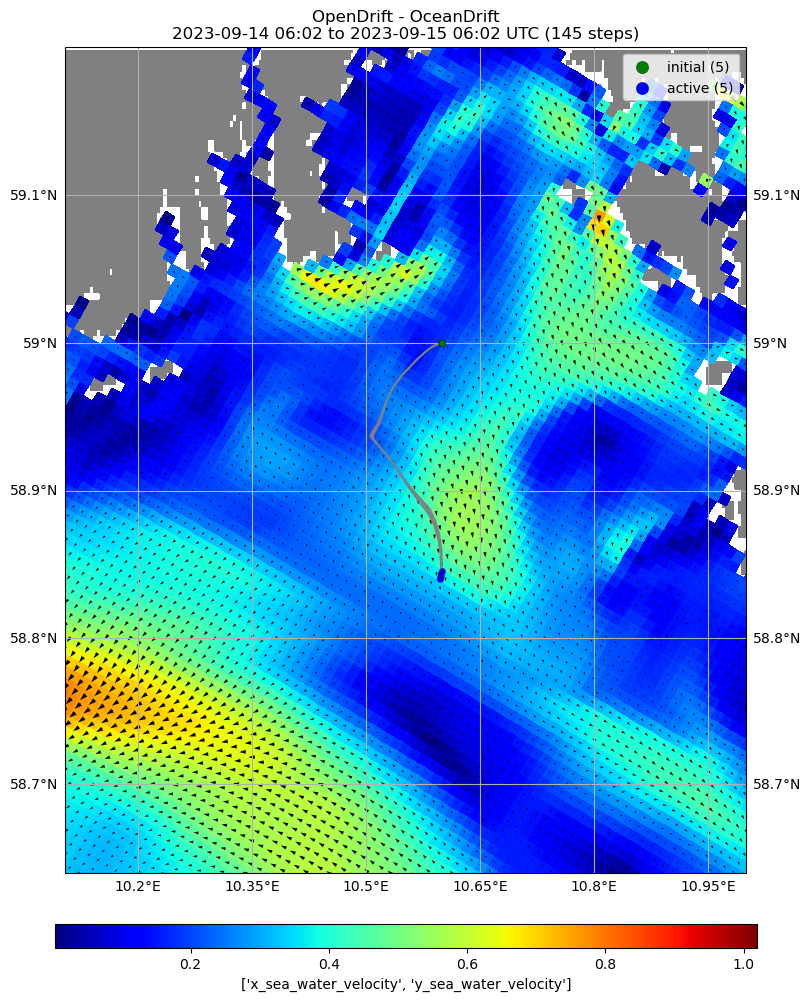

(<GeoAxes: title={'center': 'OpenDrift - OceanDrift\n2023-09-14 06:02 to 2023-09-15 06:02 UTC (145 steps)'}>,
 <Figure size 907.189x1100 with 2 Axes>)

In [10]:
# Plot background currents
o1.plot(fast=True, background=['x_sea_water_velocity', 'y_sea_water_velocity'])